# Assignment 02: Neural Networks and Curve Fitting

## Wyatt Smith

### Phys. 494

### 02/25/2021

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)

In [5]:
def feed_forward(a0,w,b):
    a = a0
    num_layers = len(w)
    
    # feed the input layer forward
    for ℓ in range(num_layers):
        z = np.dot(w[ℓ],a) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

### 1. Neural Networks Encoding Boolean Functions 

#### a) `AND` 

The assignment stipulates constructing a simple neural network with 2 input neurons and 1 output neuron, corresponding to the inputs and output of the `AND` function. 

In [6]:
# First, we define an array containing the number of neurons at each level.
# Here, we there to be 2 neurons on the first (input) layer and 1 on the last (output)

N = [2,1]

Now, want to choose the weights and biases such that we get a high value when the input is $(1,1)$ and a low value everywhere else. 

An obvious choice of weights and biases is then 1,1 and -1 respectively, as if the inputs are both $1$, we would get an output of $\sigma(1) \approx .75$, if one of the inputs is $1$, we get $\sigma(0) = .5$, and if neither input is $1$, we get $\sigma(-1) \approx .25$. 

In [7]:
w,b = [[[1,1]]],[-1]

Plotting this: 

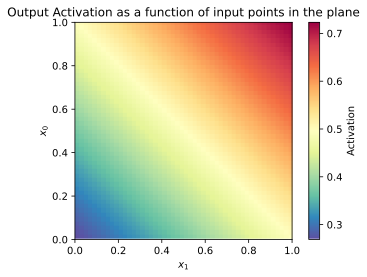

In [8]:
grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)


for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

This is a decent start, but we would like for the values to be more extreme at the relevant corners. 

We know that our sigmoid function is monotone increasing, so we can increase the argument of our sigmoid functions by scaling the weights and biases: 

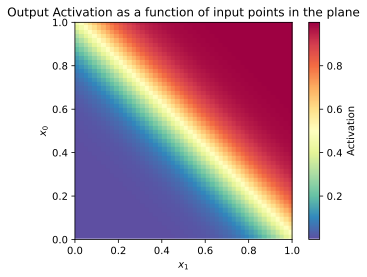

In [9]:
w,b = [[[10,10]]],[-10]

grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

This is much better in the upper-right and bottom-left corners, but a value of $0.5$ leaves much to be desired for the other two. We can fix this by making the bias slightly greater in magnitude than the value at the weights, so it maps these corners to $
\sigma$ of some negative number while keeping the value at the top-right corner large:

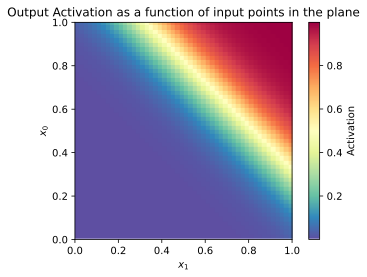

In [10]:
w,b = [[[10,10]]],[-13]

grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)


for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

If we decrease this scale value, we can get `TRUE` values for some reasonable neighborhood of $(1,1)$. This mimics the actual implementation of `AND` gates, as they interpret a certain interval of input volatage as a logical `1`. 

Another way we could memic this behavior is by adding a hidden layer to the neural network: 

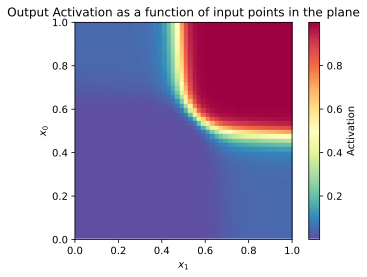

In [11]:
N = [2,2,1]
# We pass this asymmetric AND function through inverted to the two neurons 
#and then take the inverted AND function of these hidden neurons
#to be the output.
w,b = [[[-20,-1],[-1,-20]],[-10,-10]],[[11,11],[7]]

grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

# we will apply our simple NN for all grid points in the box x = [-0.5..0.5,-0.5..0.5]
for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
        
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

Or in a more extreme case: 

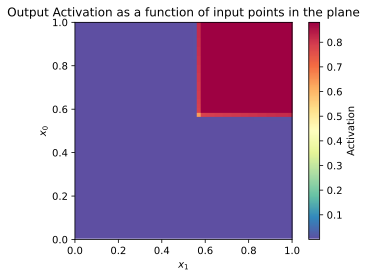

In [12]:
w,b = [[[-200,-1],[-1,-200]],[-10,-10]],[[110,110],[2]]

grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
        
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

#### b) `XOR`

A mistake in my procedure for constructing the weights and biases for the second `AND` function yielded the following:

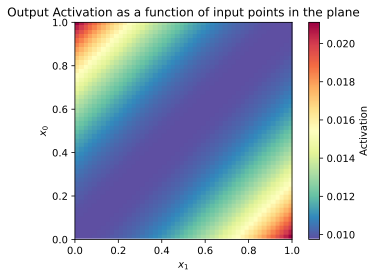

In [13]:
w,b = [[[-1,1],[1,-1]],[10,10]],[[-1,-1],[-10]]

grid_size = 50 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)


for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i/grid_size,j/grid_size]
        a1[i,j] = feed_forward(a0,w,b)[0]
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
        
plt.imshow(a1,origin='lower', extent=(0,1,0,1),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

This is a pretty good model of an `XOR` function, especially considering that it was achieved with just one hidden layer. Hypothetically, we could create an `XOR` function by recycling our weights and biases for the `AND` and function in a certain architecture based on the construction of a `XOR` gate from `NAND` gates. However, the given weights and biases appear to be sufficient. 




### 2)  Feature Mapping and Linear Regression

Suppose ${\bf{w}}^*$ is a minimum to the cost function. 

Since $C$ is convex and bounded below by zero, we know that ${\bf{w}}^*$ is a minimum **if and only if** 

$$\nabla_{\bf{w}} C \ ({\bf{w}^*})= 
{\bf{0}},$$ 

i.e. 

$$\frac{\partial C} {\partial w^*_j} = 0 \ \ \ \ ^\forall j \in \{1,2,... M-1\}.$$
$$$$

So, we have that 

$$ 0 = \frac{\partial C} {\partial w^*_j}=  \frac{1}{2N}\sum_{n = 1}^{N} 2 {{\phi}}_j(x^{(n)})\big({\bf{w}^*} \cdot {\boldsymbol{\phi}}(x^{(n)}) - y^{(n)}\big )$$ 

implying that 

$$0 = \sum_{n = 1}^{N}  {\bf{\phi}}_j(x^{(n)})({\bf{w}}^* \cdot {\boldsymbol{\phi}}(x^{(n)})) -\sum_{n = 1}^{N} {\bf{\phi}}_j(x^{(n)}) y^{(n)}$$.

By expanding the dot product in the first summand and rearranging our difference equation: 

$$ \sum_{n = 1}^N \phi_j(x^{(n)})y^{(n)} = \sum_{n=1}^{N} \sum_{i = 0}^{M-1} w_i\phi_i(x^{(n)})\phi_j(x^{(n)}).$$

However, if we let $A =(a_{ij})$ be the $M \times M$ matrix given by 

$$a_{ij} = \sum_{n = 1}^{N} \phi_i(x^{(n)})\phi_j(x^{(n)})$$

or equivalently by 

$${\bf{A}} = \boldsymbol{\phi}^T\boldsymbol{\phi},$$

then the above equation is precisely equivalent to 

$$A{\bf w}^* = \phi^T{\bf{y}}.$$
$$$$

Since $\boldsymbol{\phi}$ is invertible, so are $\boldsymbol{\phi}^T$ and $\boldsymbol{\phi}^T\boldsymbol{\phi}$ likewise. 
$$$$

Thus, ${\bf{w}}^* = A^{-1} \phi^T{\bf y}$, i.e.


$${\bf{w}}^* = (\boldsymbol{\phi}^T\boldsymbol{\phi})^{-1} \boldsymbol{\phi}^T{\bf y}. \ \ \ \Box$$


##### Remark: 
>It's hard to tell $\phi$ and $\boldsymbol{\phi}$ apart in the notebook. It looks nice in TexStudio, but not here. I'm using `\phi` and `\boldsymbol{\phi}`. Both `\phi` and `\bf \phi` appear as $\phi$ here for some reason. 

### 3) Non-Linear Curve Fitting via Gradient Descent

#### a) Load the Data

In [14]:
!head data1/C60_nmr.dat

# Ch Shift [ppm]         Intensity [arb]
      4.94240036	     -0.00341535
      5.34654062	      0.01362526
      5.48103393	     -0.01352983
      5.72144358	     -0.02962094
      5.97842725	     -0.10792436
      6.30495735	      0.08369806
      6.45551406	      0.00789721
      6.79061605	      0.02323168
      6.97147558	      0.04645734


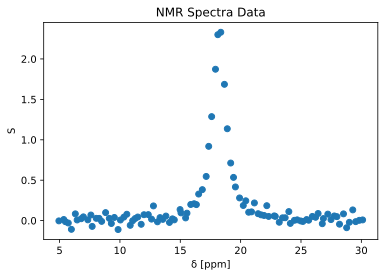

In [24]:
x,y = np.loadtxt('data1/C60_nmr.dat',unpack=True);
plt.plot(x,y, 'o');
plt.xlabel('δ [ppm]');
plt.ylabel('S');
plt.title("NMR Spectra Data");

#### b) Perform the least squares minimization 

Our model, of course, is 

$$\hat S(\delta,(\alpha,\beta)^T) = \hat S(\delta,{\bf{w}}) = \frac{1}{(\delta - \alpha)^2 + \beta},$$ 

so we first define our cost function. 

For convenience, I denote $\hat S(x^{(n)},{\bf{w}}) = \hat y^{(n)}$, so our cost function is 

$$C({\bf{w}}) = \frac{1}{2N}  \sum_{n = 1}^N \mid\mid\hat y^{(n)} -y^{(n)}\mid\mid^2.$$ 

In [16]:
from jax import jacfwd
import jax.numpy as jnp

In [17]:
def Ŝ(δ,w):
    α, β = w[0], w[1]
    
    return(1/((δ-α)**2+β))

def C(w):
    #x is defined globally
    ŷ = Ŝ(x,w)
    N = len(ŷ)
        
    return 0.5*jnp.average((ŷ-y)**2)

Now, implementing gradient descent *with Nesterov Accelerated Gradient* ***(NAG)***

In [18]:
dC_dw = jacfwd(C,argnums=0)

In [19]:
# hyperparameters
η = 0.1
γ = 0.9
num_iter = 2*10**3

##we want to start near a good guess for w. Visually the height is a little bit above two
#so we expect beta to be less than .5 by a bit. 
#Similarly, the symmetric point is between 15 and 20, so we want alpha to be in that range
w = np.random.uniform(low=15,high=20,size=2)
w[1] = .5
v = np.zeros(2)

for i in range(num_iter):

    # perform the NAG update
    v = γ*v + η*dC_dw(w-γ*v)
    w -= v


We will print our values for $\alpha$ and $\beta$ as well as the mean square difference:

In [20]:
print("α = ", w[0], "\nβ = ", w[1], "\nC(w) = ", C(w))

α =  18.22975 
β =  0.41906193 
C(w) =  0.0013357982


This is a low mean squares error, which is promising. Let's plot the data: 

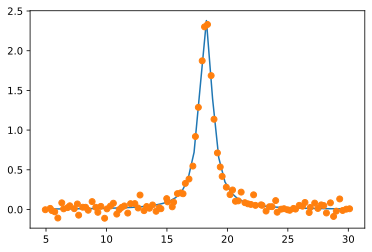

In [21]:
t = np.linspace(5,30)
ymod = Ŝ(t,w)

plt.plot(t,ymod);
plt.plot(x,y,'o');

This looks correct. So, we next dump this data into a .json file. 

In [22]:
import json

data={
    "alpha": float(w[0]) ,
    "beta": float(w[1]) ,
    "num_iter": num_iter ,
    "eta": float(η) ,
    "gamma": float(γ)
}

out_file = open("C60_optimal.json", "w")
json.dump(data, out_file, indent=1)

#### c) Plot

Let's just spruce up the earlier plot: 

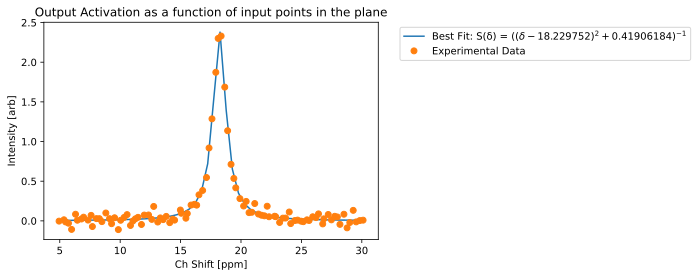

In [23]:
line1, = plt.plot(t,ymod)
line2, = plt.plot(x,y,'o')
plt.title('Output Activation as a function of input points in the plane');
plt.xlabel(r'Ch Shift [ppm]');
plt.ylabel(r'Intensity [arb]');
plt.legend((line1, line2), ('Best Fit: S(δ) = $((δ-18.229752)^2 + 0.41906184)^{-1}$', 'Experimental Data'),bbox_to_anchor=(1.05, 1), loc='upper left',);